In [2]:
import matplotlib
%matplotlib inline

from Wavefront import Image, TELESCOPE_DICT, Telescope
import os
import glob
from astropy.io import fits

## Set directories for convenience
main_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18'
data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

/nfs/slac/g/ki/ki06/roodman/Software/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [34]:
x = glob.glob(os.path.join(data_directory, "ugp_When*.fits"))
hdulist = fits.open(x[0], memmap=True)

scidata = hdulist[0].data
print scidata.shape

(27397, 48, 48)


In [30]:
xgrid = np.zeros((48,48))
for j in np.arange(48):
    xgrid[:,j] = j
if (48 % 2):
    offset = 0.
else:
    offset = (48-1)/2.0
xgrid = xgrid - offset
    
ax = xgrid * 8.4/48.
ay = ax.transpose()
ar = np.sqrt(ax**2 + ay**2)

ap_outer = (ar < 7.77/2)
ap_inner = (ar < 1.024/2)
pupil = np.logical_not(ap_outer - ap_inner)

/nfs/slac/g/ki/ki06/roodman/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.


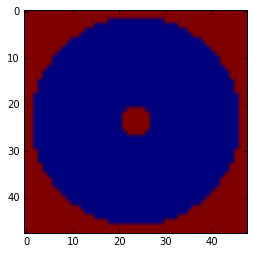

In [31]:
plt.imshow(pupil)

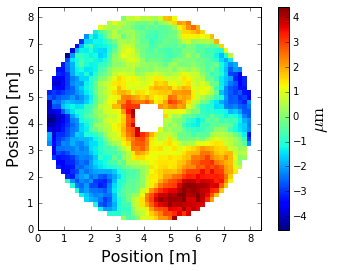

In [35]:
masked_phase = np.ma.array(scidata[0,:,:], mask=pupil)

plt.imshow(masked_phase, interpolation='none', origin='lower', 
           extent=(0.0, 8.4, 0.0, 8.4))
plt.ylabel('Position [m]', fontsize=16)
plt.xlabel('Position [m]', fontsize=16)
cb = plt.colorbar(orientation='vertical')
cb.set_label(label=r"$\mu \mathrm{m}$", fontsize=18)
plt.savefig("reconstructed_example.png")

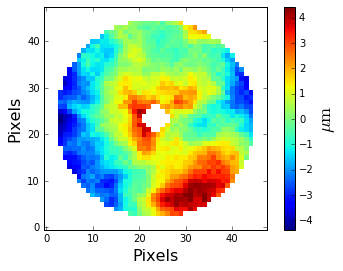

In [4]:
sample = Image(scidata[0,:,:])
sample.display(mask=pupil_mask, cbar_label=r"$\mu \mathrm{m}$", ylabel='Pixels', xlabel='Pixels',
               save_image="phase_map_example.png")

In [3]:
y = glob.glob(os.path.join(data_directory, "example_kolmogorov_sim.fits"))

hdulist = hdulist = fits.open(y[0], memmap=True)
scidata = hdulist[0].data

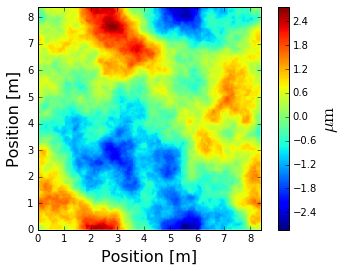

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(0.5*scidata[500,:,:]/(2*np.pi), interpolation='none', origin='lower', 
           extent=(0.0, 8.4, 0.0, 8.4))
plt.ylabel('Position [m]', fontsize=16)
plt.xlabel('Position [m]', fontsize=16)
cb = plt.colorbar(orientation='vertical')
cb.set_label(label=r"$\mu \mathrm{m}$", fontsize=18)
plt.savefig("sim_example.png")

In [7]:
8.4/(256.)

0.0328125